In [51]:
from glob import glob
import numpy as np

tmax = 2001

mol_pos_x = np.full((5200, tmax), np.nan)
mol_pos_y = np.full((5200, tmax), np.nan)
mol_pos_z = np.full((5200, tmax), np.nan)

files = glob("viz_data/consumption_reduced/*.dat")



for f in files:
    file_num = int(f.strip(".dat").split(".")[-1])
    lines = [l.strip("\n") for l in open(f).readlines()]
    for l in lines:
        mol_type, mol_num, x, y, z, _1, _2, _3 = l.split(" ")
        mol_num, x, y, z = int(mol_num), float(x), float(y), float(z)
        mol_pos_x[mol_num, file_num] = x
        mol_pos_y[mol_num, file_num] = y
        mol_pos_z[mol_num, file_num] = z
    
mol_num, x, y, z

(5182, 0.0736349463, -0.000351266409, 0.00287478872)

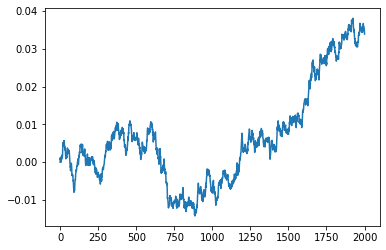

In [52]:
import matplotlib.pyplot as plt

# Plot of the trajectory over x of one neurotransmitter
plt.plot(mol_pos_x[0,:])

Text(0.5, 1.0, 'Evolution of the z coord for one particle over the simulation')

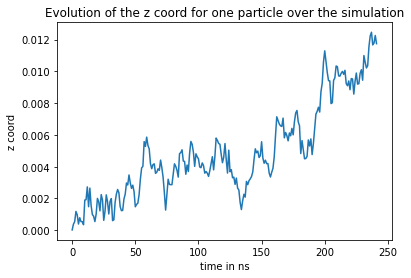

In [53]:
import matplotlib.pyplot as plt

# Plot of the trajectory over z of one neurotransmitter. It cannot go higher than 20 nm so the plot should top at 0.02
plt.plot(mol_pos_z[1,:])
plt.xlabel("time in ns")
plt.ylabel("z coord")
plt.title("Evolution of the z coord for one particle over the simulation")

In [54]:
# Now we will count the amount of particle coming close to z=0.02 over time.
# We can consider they have arrived in this region if z>0.19

is_on_top = mol_pos_z > 0.019
first_arrival_in_top = np.zeros(5200)

for p in range(5200):
    traj_p = is_on_top[p,:]
    occurences = np.where(traj_p)[0]
    if len(occurences) == 0:
        first_arrival_in_top[p] = tmax
    else:
        t = occurences[0]
        first_arrival_in_top[p] = t

Text(0.5, 1.0, 'Distribution of times of arrival')

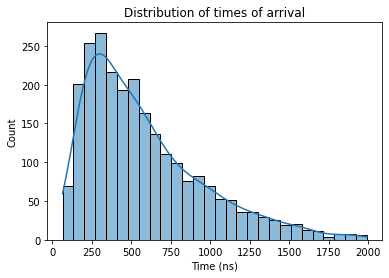

In [55]:
import seaborn as sns

sns.histplot(first_arrival_in_top[first_arrival_in_top < tmax], kde=True, cumulative=False)
plt.xlabel("Time (ns)")
plt.title("Distribution of times of arrival")

Text(0.5, 0, 'Time (ns)')

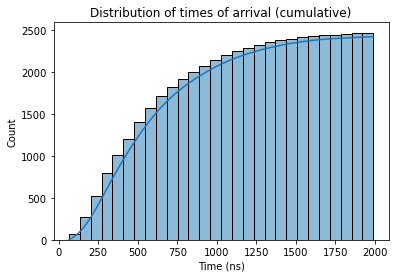

In [56]:
sns.histplot(first_arrival_in_top[first_arrival_in_top < tmax], kde=True, cumulative=True)
plt.title("Distribution of times of arrival (cumulative)")
plt.xlabel("Time (ns)")